In [2]:
from KDE import kde
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
observations = [65, 75, 67, 79, 81, 91]

In [4]:
s = kde(observations, bandwidth=5)

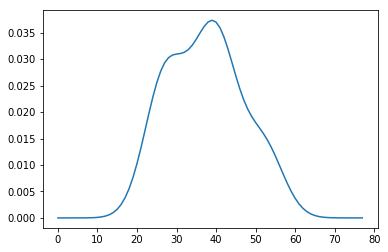

In [5]:
plt.plot(s)

# optimization

In [200]:
_observations = [65, 75, 67,79, 75,63,71,83,91, 95]

In [247]:
from scipy.stats import norm

def term1(obs, h):
    """
    
    """
    space = (np.arange(60,96) - obs) / h
    d = np.round(norm.pdf(space, loc=0, scale=1), 3)
    mask = np.argmax(np.arange(60,96) == obs)
    d[mask] = 0
    s = np.sum(d)
    return np.log(s)

In [260]:
def objective1(h):
    diff = 0

    for o in _observations:
        diff += term1(o, h) - np.log(9 * h)
    diff /= len(_observations)
    return diff

In [250]:
from scipy import optimize

In [261]:
objective1(3)

-2.43842353761534

In [251]:
m_guess = 3

res = optimize.minimize(objective1, 3)
print(res.x)

[3.]


In [252]:
optimize.minimize_scalar(objective1, method='bounded', bounds=[0, 10])

     fun: 2.4230751019419863
 message: 'Solution found.'
    nfev: 28
  status: 0
 success: True
       x: 3.975837694038778

In [255]:
objective1(1), objective1(3.975837694038778), objective1(5)

(2.777364919158205, 2.4230751019419863, 2.4284061896644107)

/Users/vincenttang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/vincenttang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/vincenttang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/vincenttang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/vincenttang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


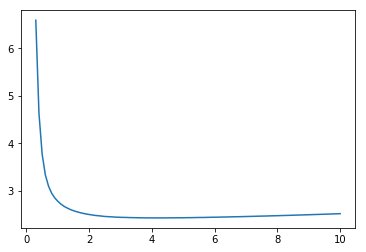

In [259]:
X = np.linspace(0, 10, 100)

y = []

for xs in X:
    y.append(objective1(xs))
plt.plot(X, y)